<h1><font color="#113D68" size=5>Redes neuronales y deep learning</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: análisis de un problema de regresión con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>Semana 3: Ajuste de modelos de Deep Learning</font><br>
<font size=3>IEBS</font>
</div>

---


<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [California Housing Dataset](#section2)
* [Establecer una función de coste adecuada a nuestro problema](#section3)
* [Overfitting sobre un pequeño conjunto de datos](#section4)
    - [Ejercicio 1](section4.1)
    - [Ejercicio 2](section4.2)
    - [Ejercicio 3](section4.3)
    - [Ejercicio 4](section4.4)
    - [Ejercicio 5](section4.5)
* [Elegimos un Optimizer](#section5)
    - [Ejercicio 6](section5.1)
    - [Ejercicio 7](section5.2)
    - [Ejercicio 8](section5.3)
* [Probar diferentes configuraciones con un número pequeño de epochs](#section6)
    - [Ejercicio 9](section6.1)
    - [Ejercicio 10](section6.2)
* [Ajuste refinado de los parámetros con más epochs](#section7)
    - [Ejercicio 11](section7.1)
    - [Ejercicio 12](section7.2)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la última actividad realizada en la semana anterior. En la actividad de la semana anterior encontramos la mejor arquitectura para los datos que tenemos y ahora vmoas a realizar más experimentos jugando con los optimizers y el valor del learning rate.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (California Housing Dataset) y desde 0 intentar llegar conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendrmeos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional son los últimos ejercicios donde tendréis que sacar una conclusión de si la red que habéis llegado a conseguir tiene un buen rendimiento.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset California Housing con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección.

# <font color="#004D7F" size=5>California Housing Dataset</font>
En este notebook vamos a usar un dataset nuevo, el dataset es muy parecido al dataset del precio de las casas de boston. Esta vez vamos a utilizar un conjunto de datos que contienen información sobre el precio de las casas encontradas en un distrito de California. Las columnas son las siguientes:

- _longitude_: cuanto de al oeste está una casa; un valor más alto está más al oeste.
- _latitude_: cuanto de al norte está una casa; un valor más alto está más al norte.
- _housing_median_age_: edad media de una casa; un valor bajo es una casa más nueva.
- _total_rooms_: número total de habitaciones.
- _total_bedrooms_: número total de dormitorios.
- _population_: número total de personas que residen.
- _households_: número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda.
- _median_income_: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares).
- _ocean_proximity_: ubicación de la casa cerca del océano o mar.
- _median_house_value (**variables a predecir**)_: valor medio de la vivienda (medido en dólares).

Vamos a cargar los datos desde el fichero `housing.csv`:

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [4]:
df.shape

(20433, 10)

Vamos a separar la variable objetivo del resto de variables (accedemos al campo value para que los datos sean de tipo _numpy array_ y se puedan usar como variable de entrada de nuestra red):

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']].values
y = df[['median_house_value']].values

## 1. Establecer una función de coste adecuada a nuestro problema.

En este caso, como es un problema de regresión y los valores de nuestros datos son tan grandes, elegimos la función de coste `mean_absolute_percentage_error`, este error varía entre los valores 100 y 0 donde 100 es el pero error que podemos llegar a tener y 0 es el mejor error, por lo que en nuestros entrenamientos buscaremos un error más cercano a 0.

In [7]:
actual_loss = 'mean_absolute_percentage_error'

## 2. Overfitting sobre un pequeño conjunto de datos.

Ahora, como ya hemos visto en clase vamos a encontrar una estructura de red que encaje con los datos que vamos a utilizar. Vamos a crear varias redes a ver que talfuncionan.

Para hacer entrenamientos rápidos y ver si la red se adapta a los datos vamos a usar solo un subconjunto de los datos, es decir usaremos 1000 datos y no usaremos conjunto de validación.

### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

Forma de x_subset: (1000, 9)
Forma de y_subset: (1000, 1)
Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 51862593536.0000 - mean_absolute_percentage_error: 100.0194
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 51710676992.0000 - mean_absolute_percentage_error: 99.8485
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 51453431808.0000 - mean_absolute_percentage_error: 99.5579
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 50971729920.0000 - mean_absolute_percentage_error: 98.9953
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 49821806592.0000 - mean_absolute_percentage_error: 97.6337
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 47728742400.0000 - mean_absolute_percentage_error: 95.1810
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 44582137856.0000 - mean_absolute_percentage_error: 91.1982
Epoch 8/30
32/32 [======

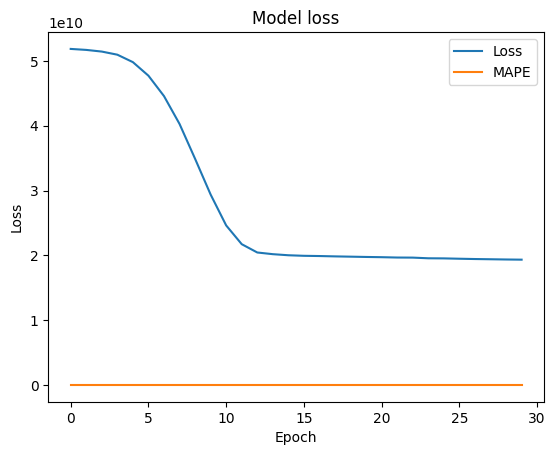

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Tomar un subconjunto de 1000 datos
x_subset = x[:1000]
y_subset = y[:1000]

# Verificar la forma del subconjunto
print(f'Forma de x_subset: {x_subset.shape}')  # Debe mostrar (1000, 9)
print(f'Forma de y_subset: {y_subset.shape}')  # Debe mostrar (1000, 1)

# Definir la arquitectura de la red
model = Sequential([
    Dense(8, activation='relu', input_shape=(9,)),  # 9 caracteristicas en la entrada
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[actual_loss])

# Entrenar el modelo sin validación
history = model.fit(x_subset, y_subset, epochs=30)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history[actual_loss], label='MAPE')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### <font color="#004D7F" size=4>Ejercicio 2</font>

Vamos a complicar un poco más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

Forma de x_subset: (1000, 9)
Forma de y_subset: (1000, 1)
Epoch 1/30
32/32 [==============================] - 1s 5ms/step - loss: 51523948544.0000 - mean_absolute_percentage_error: 99.6255
Epoch 2/30
32/32 [==============================] - 0s 5ms/step - loss: 47855362048.0000 - mean_absolute_percentage_error: 95.2126
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 29147574272.0000 - mean_absolute_percentage_error: 66.1206
Epoch 4/30
32/32 [==============================] - 0s 7ms/step - loss: 20721080320.0000 - mean_absolute_percentage_error: 45.5886
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 20028768256.0000 - mean_absolute_percentage_error: 45.1891
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 19897458688.0000 - mean_absolute_percentage_error: 44.6055
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 19813660672.0000 - mean_absolute_percentage_error: 45.0702
Epoch 8/30
32/32 [=======

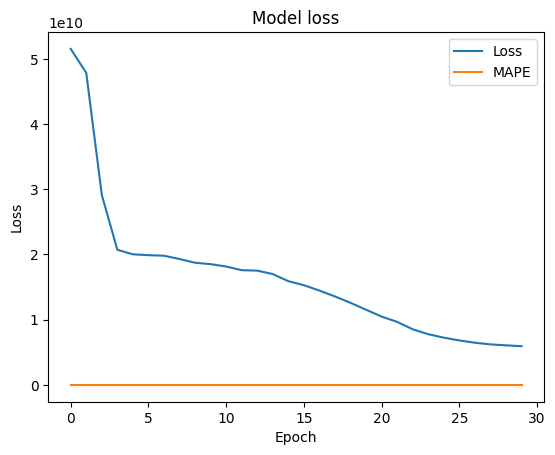

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Tomar un subconjunto de 1000 datos
x_subset = x[:1000]
y_subset = y[:1000]

# Verificar la forma del subconjunto
print(f'Forma de x_subset: {x_subset.shape}')  # Debe mostrar (1000, 9)
print(f'Forma de y_subset: {y_subset.shape}')  # Debe mostrar (1000, 1)

# Definir la arquitectura de la red
model = Sequential([
    Dense(64, activation='relu', input_shape=(9,)),  # 9 caracteristicas en la entrada
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[actual_loss])

# Entrenar el modelo sin validación
history = model.fit(x_subset, y_subset, epochs=30)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history[actual_loss], label='MAPE')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### <font color="#004D7F" size=4>Ejercicio 3</font>

Vamos a complicar aun más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *6º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

Forma de x_subset: (1000, 9)
Forma de y_subset: (1000, 1)
Epoch 1/30
32/32 [==============================] - 1s 3ms/step - loss: 50329382912.0000 - mean_absolute_percentage_error: 98.1986
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 28636747776.0000 - mean_absolute_percentage_error: 64.2772
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 22679760896.0000 - mean_absolute_percentage_error: 48.2806
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 19759030272.0000 - mean_absolute_percentage_error: 44.8431
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 20394412032.0000 - mean_absolute_percentage_error: 44.0854
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 18878609408.0000 - mean_absolute_percentage_error: 42.6183
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 18137888768.0000 - mean_absolute_percentage_error: 42.0696
Epoch 8/30
32/32 [=======

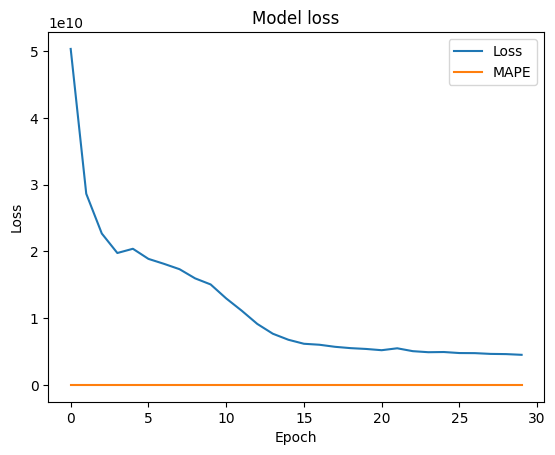

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Tomar un subconjunto de 1000 datos
x_subset = x[:1000]
y_subset = y[:1000]

# Verificar la forma del subconjunto
print(f'Forma de x_subset: {x_subset.shape}')  # Debe mostrar (1000, 9)
print(f'Forma de y_subset: {y_subset.shape}')  # Debe mostrar (1000, 1)

# Definir la arquitectura de la red
model = Sequential([
    Dense(128, activation='relu', input_shape=(9,)),  # 9 caracteristicas en la entrada
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[actual_loss])

# Entrenar el modelo sin validación
history = model.fit(x_subset, y_subset, epochs=30)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history[actual_loss], label='MAPE')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### <font color="#004D7F" size=4>Ejercicio 4</font>

Vamos a hacer una última red con más capas y neuronas:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 1024 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 512 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 256 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *6º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *7º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *8º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *9º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

Forma de x_subset: (1000, 9)
Forma de y_subset: (1000, 1)
Epoch 1/30
32/32 [==============================] - 4s 57ms/step - loss: 34544246784.0000 - mean_absolute_percentage_error: 70.7131
Epoch 2/30
32/32 [==============================] - 2s 49ms/step - loss: 20856870912.0000 - mean_absolute_percentage_error: 46.5397
Epoch 3/30
32/32 [==============================] - 1s 33ms/step - loss: 18447144960.0000 - mean_absolute_percentage_error: 42.5053
Epoch 4/30
32/32 [==============================] - 1s 33ms/step - loss: 15061788672.0000 - mean_absolute_percentage_error: 38.1363
Epoch 5/30
32/32 [==============================] - 1s 32ms/step - loss: 9752365056.0000 - mean_absolute_percentage_error: 34.1526
Epoch 6/30
32/32 [==============================] - 1s 32ms/step - loss: 6219945984.0000 - mean_absolute_percentage_error: 34.7626
Epoch 7/30
32/32 [==============================] - 1s 31ms/step - loss: 5593903616.0000 - mean_absolute_percentage_error: 32.1584
Epoch 8/30
32/32 [===

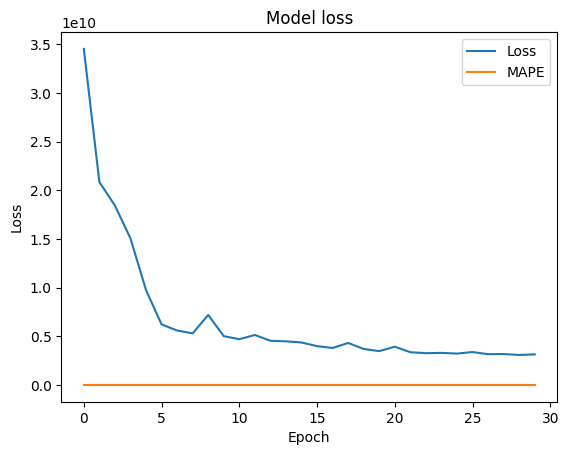

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Tomar un subconjunto de 1000 datos
x_subset = x[:1000]
y_subset = y[:1000]

# Verificar la forma del subconjunto
print(f'Forma de x_subset: {x_subset.shape}')  # Debe mostrar (1000, 9)
print(f'Forma de y_subset: {y_subset.shape}')  # Debe mostrar (1000, 1)

# Definir la arquitectura de la red
model = Sequential([
    Dense(1024, activation='relu', input_shape=(9,)),  # 9 caracteristicas en la entrada
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[actual_loss])

# Entrenar el modelo sin validación
history = model.fit(x_subset, y_subset, epochs=30)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history[actual_loss], label='MAPE')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada una de las arquitecturas definidas y quédate con la mejor. **¿En qué experimento se obtiene los mejores resultados?**

La arquitectura elegida la usaremos en el caso práctico para seguir ajustando nuestro modelo y alcanzar un buen rendimiento.

In [ ]:
# En la arquitectura del ejercicio 4 hemos logrado un mean_absolut_percentage_error menor de hasta 22.36%

## 3. Elegimos un Optimizer.

Hemos establecido Adam en los entrenamientos anteriores. Vamos a comprobarlo para el conjunto de validación como funciona y después probaremos a usar un optimizador SGD.

### <font color="#004D7F" size=4>Ejercicio 6</font>

Usa la mejor arquitectura y configuración de entrenamiento de los ejercicios anteriores y entrena con la siguiente configuración:

- Usa un `validation_split` de 0.2
- Utiliza todos los datos y no solo 1000.
- Usa 5 epochs en total.

Forma de x: (20433, 9)
Forma de y: (20433, 1)
Epoch 1/5
511/511 [==============================] - 19s 34ms/step - loss: 15853680640.0000 - mape: 55.8148 - val_loss: 11864811520.0000 - val_mape: 52.1934
Epoch 2/5
511/511 [==============================] - 19s 36ms/step - loss: 8744710144.0000 - mape: 48.7968 - val_loss: 9215635456.0000 - val_mape: 47.5852
Epoch 3/5
511/511 [==============================] - 19s 37ms/step - loss: 7468453888.0000 - mape: 43.3137 - val_loss: 8323838976.0000 - val_mape: 42.0422
Epoch 4/5
511/511 [==============================] - 24s 47ms/step - loss: 6914264576.0000 - mape: 40.5780 - val_loss: 7283291136.0000 - val_mape: 41.1496
Epoch 5/5
511/511 [==============================] - 16s 32ms/step - loss: 6398703616.0000 - mape: 38.5421 - val_loss: 7948554240.0000 - val_mape: 34.9236


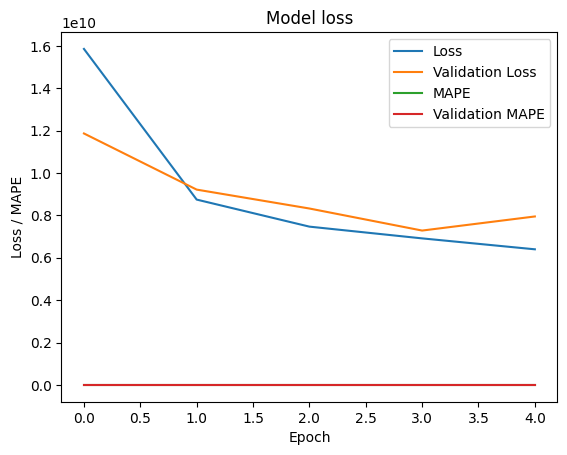

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Usar todos los datos disponibles

# Verificar la forma de los datos completos
print(f'Forma de x: {x.shape}')
print(f'Forma de y: {y.shape}')

# Definir la arquitectura de la red
model = Sequential([
    Dense(1024, activation='relu', input_shape=(9,)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])

# Entrenar el modelo con validación
history = model.fit(x, y, epochs=5, validation_split=0.2)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mape'], label='MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Model loss')
plt.ylabel('Loss / MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


### <font color="#004D7F" size=4>Ejercicio 7</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero usa un optimizador **SGD** en lugar de un Adam.

Forma de x: (20433, 9)
Forma de y: (20433, 1)
Epoch 1/5
511/511 [==============================] - 16s 31ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 2/5
511/511 [==============================] - 14s 28ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 3/5
511/511 [==============================] - 15s 29ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 4/5
511/511 [==============================] - 14s 27ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 5/5
511/511 [==============================] - 16s 32ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan


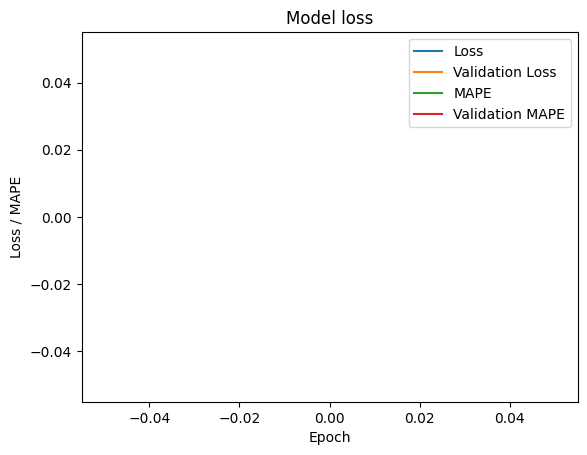

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Usar todos los datos disponibles

# Verificar la forma de los datos completos
print(f'Forma de x: {x.shape}')
print(f'Forma de y: {y.shape}')

# Definir la arquitectura de la red
model = Sequential([
    Dense(1024, activation='relu', input_shape=(9,)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = SGD(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])

# Entrenar el modelo con validación
history = model.fit(x, y, epochs=5, validation_split=0.2)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mape'], label='MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Model loss')
plt.ylabel('Loss / MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### <font color="#004D7F" size=4>Ejercicio 8</font>

**¿Qué optimizador ha funcionado mejor?**

El optimizador que eligas tendrás que usarlo en los siguientes ejercicios.

In [ ]:
# Me quedaré con Adam ya que SGD no me arrojó resultados sobre los errores cuando entiendo debería de hacerlo por lo cual

## 4. Probar diferentes configuraciones con un número pequeño de epochs.

Vamos a realizar diferentes experimentos cambiando el learning rate de nuestro optimizador.

### <font color="#004D7F" size=4>Ejercicio 9</font>

Realiza un entrenamiento con la arquitectura y el optimizador que mejor te ha funcionado y utilizar un **learning rate de 0.1**.

Forma de x: (20433, 9)
Forma de y: (20433, 1)
Epoch 1/5
511/511 [==============================] - 18s 32ms/step - loss: 11258579235373056.0000 - mape: 2752.2236 - val_loss: 65478512640.0000 - val_mape: 100.0002
Epoch 2/5
511/511 [==============================] - 18s 34ms/step - loss: 53777293312.0000 - mape: 100.0000 - val_loss: 65478451200.0000 - val_mape: 100.0000
Epoch 3/5
511/511 [==============================] - 23s 45ms/step - loss: 53777203200.0000 - mape: 100.0000 - val_loss: 65478336512.0000 - val_mape: 100.0000
Epoch 4/5
511/511 [==============================] - 16s 30ms/step - loss: 53777039360.0000 - mape: 100.0000 - val_loss: 65478148096.0000 - val_mape: 99.9998
Epoch 5/5
511/511 [==============================] - 16s 31ms/step - loss: 53776891904.0000 - mape: 99.9999 - val_loss: 65477951488.0000 - val_mape: 99.9995


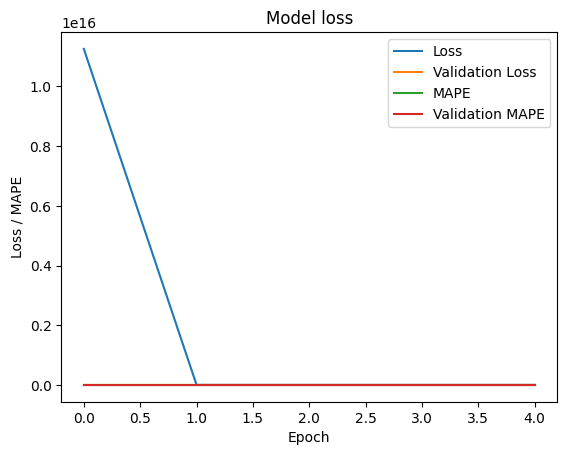

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Usar todos los datos disponibles

# Verificar la forma de los datos completos
print(f'Forma de x: {x.shape}')
print(f'Forma de y: {y.shape}')

# Definir la arquitectura de la red
model = Sequential([
    Dense(1024, activation='relu', input_shape=(9,)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.1)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])

# Entrenar el modelo con validación
history = model.fit(x, y, epochs=5, validation_split=0.2)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mape'], label='MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Model loss')
plt.ylabel('Loss / MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### <font color="#004D7F" size=4>Ejercicio 10</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero esta vez usa un **learning rate de 0.0001**.

Forma de x: (20433, 9)
Forma de y: (20433, 1)
Epoch 1/5
511/511 [==============================] - 17s 32ms/step - loss: 29294440448.0000 - mape: 61.6290 - val_loss: 26450968576.0000 - val_mape: 52.5152
Epoch 2/5
511/511 [==============================] - 16s 32ms/step - loss: 15843450880.0000 - mape: 52.0521 - val_loss: 13592112128.0000 - val_mape: 54.7960
Epoch 3/5
511/511 [==============================] - 17s 33ms/step - loss: 10602256384.0000 - mape: 54.1790 - val_loss: 11717004288.0000 - val_mape: 58.5520
Epoch 4/5
511/511 [==============================] - 18s 35ms/step - loss: 9877641216.0000 - mape: 53.3917 - val_loss: 11263191040.0000 - val_mape: 55.7099
Epoch 5/5
511/511 [==============================] - 16s 32ms/step - loss: 9317286912.0000 - mape: 51.8782 - val_loss: 10507107328.0000 - val_mape: 61.1152


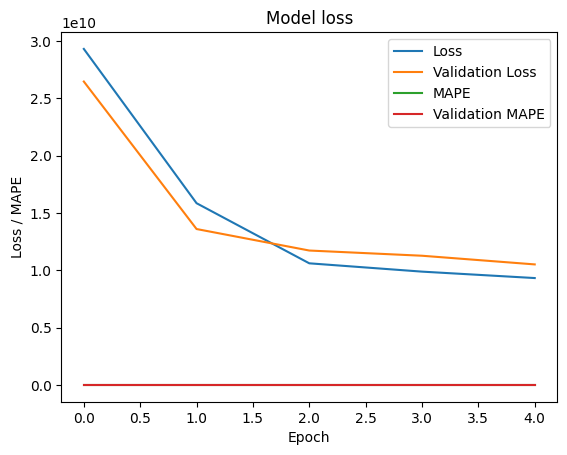

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Usar todos los datos disponibles

# Verificar la forma de los datos completos
print(f'Forma de x: {x.shape}')
print(f'Forma de y: {y.shape}')

# Definir la arquitectura de la red
model = Sequential([
    Dense(1024, activation='relu', input_shape=(9,)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.0001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])

# Entrenar el modelo con validación
history = model.fit(x, y, epochs=5, validation_split=0.2)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mape'], label='MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Model loss')
plt.ylabel('Loss / MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 5. Ajuste refinado de los parámetros con más epochs. [Opcional]

Por último vamos a realizar un entrenamiento más largo para ver hasta donde llega el rendimiento de nuestro modelo.

### <font color="#004D7F" size=4>Ejercicio 11 [Opcional]</font>

**¿Entre los entrenamientos usando learning rates igual a 0.001, 0.1 y 0.0001 cual ha funcionado mejor?**

Con el experimento que mejor haya funcionado haz un entrenamiento usando 30 epochs y ver que tal funciona el entrenamiento con más epochs.

Forma de x: (20433, 9)
Forma de y: (20433, 1)
Epoch 1/30
511/511 [==============================] - 19s 36ms/step - loss: 16309084160.0000 - mape: 55.7733 - val_loss: 12257206272.0000 - val_mape: 51.6269
Epoch 2/30
511/511 [==============================] - 24s 47ms/step - loss: 9304632320.0000 - mape: 50.1099 - val_loss: 8966737920.0000 - val_mape: 49.2552
Epoch 3/30
511/511 [==============================] - 17s 34ms/step - loss: 7576798208.0000 - mape: 43.8930 - val_loss: 10766379008.0000 - val_mape: 39.7329
Epoch 4/30
511/511 [==============================] - 15s 30ms/step - loss: 6989448192.0000 - mape: 40.9734 - val_loss: 7460606464.0000 - val_mape: 41.7848
Epoch 5/30
511/511 [==============================] - 17s 34ms/step - loss: 6274089984.0000 - mape: 37.9805 - val_loss: 7083283968.0000 - val_mape: 42.6198
Epoch 6/30
511/511 [==============================] - 17s 34ms/step - loss: 6291750400.0000 - mape: 37.9091 - val_loss: 7217959936.0000 - val_mape: 38.0723
Epoch 7/30
511/

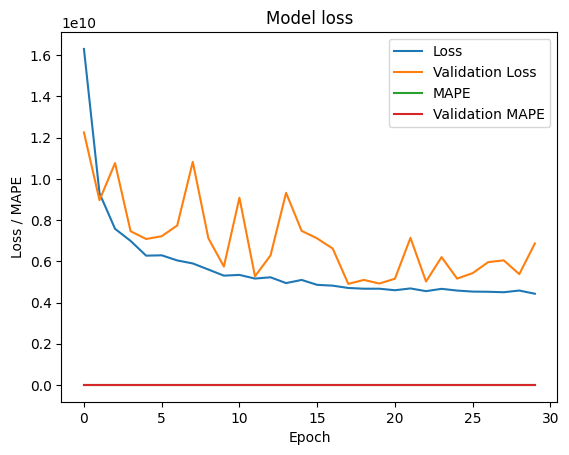

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Usar todos los datos disponibles

# Verificar la forma de los datos completos
print(f'Forma de x: {x.shape}')
print(f'Forma de y: {y.shape}')

# Definir la arquitectura de la red
model = Sequential([
    Dense(1024, activation='relu', input_shape=(9,)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Capa de salida sin función de activación
])

# Configuración del optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])

# Entrenar el modelo con validación
history = model.fit(x, y, epochs=30, validation_split=0.2)

# Visualizar la pérdida y la métrica a lo largo de las epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mape'], label='MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('Model loss')
plt.ylabel('Loss / MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


### <font color="#004D7F" size=4>Ejercicio 12 [Opcional]</font>

Muestra en una gráfica como ha evolucionado el entrenamiento.

In [18]:
# El gráfico lo he incluido en la sección de cada ejercicio y se puede ver como el validation loss fluctua mucho lo cual me podría indicar que debo aplicar algunos layers dropout